# <font color=#31809f>Chapter 4b - Plotting Tools</font>

In this chapter we will learn to visualize data beyond a quick plot as in the previous chapter. We will present two examples using the libraries __matplotlib__ and __cartopy__. The first example is a time series and second a map.

***

Let's start by importing the pertinent libraries

In [184]:
# basic libraries
import numpy as np
import pandas as pd
import xarray as xr

# necesary libraries for plotting
import matplotlib.pyplot as plt # note that in both cases we import one object within the library
import cartopy.crs as ccrs

import warnings
warnings.simplefilter('ignore') # filter some warning messages

## <font color=#d55121>Plot SST anomalies timeseries</font>  

We will use the same data from the previous chapter to calculate and plot global sea surface temperature anomalies from the Hadley dataset. And we will also calculate the climatology and anomalies of monthly data to show a slightly more complicated plot, ilustrating some __xarray__ methods.

In [185]:
# open the dataset
ds = xr.open_dataset('./data/HadISST_sst_2000-2020.nc') # read a netcdf
ds.close() # close the file, so can be use by you or others. it is good practice.

# select north and southern hemispheres, and average spatially to obtain a time series
nh_sst = ds.sst.sel(latitude=slice(90,0)).mean(dim=['latitude','longitude'])
sh_sst = ds.sst.sel(latitude=slice(0,-90)).mean(dim=['latitude','longitude'])

# Calculate climatology
nh_clim = nh_sst.groupby('time.month').mean('time') # note the application of two methods, first groupby, and then the operation to perform over the group
# Calculate and explore the anomalies
nh_ssta = nh_sst.groupby('time.month') - nh_clim  # in this case groupby 'aligns' the data with the climatology, but only substract the appropiate climatology data point
nh_ssta # Note that the new dataarray (one variable) has a new coordinate, but not dimension

<xarray.DataArray 'sst' (time: 252)>
array([-3.30897331e-01,  4.54846382e-01,  3.00818443e-01,  1.29148483e-01,
        8.01112175e-01, -1.00877762e+00, -3.31048012e-01, -3.97064209e-01,
       -3.38874817e-01, -3.19175720e-01, -4.45547104e-01,  1.49649620e-01,
        3.49483490e-01,  2.27182388e-01,  7.71281242e-01,  1.02271080e+00,
        1.36554623e+00, -8.92753601e-02, -1.98171616e-01, -3.17031860e-01,
       -3.07672501e-01, -2.43781090e-01, -3.72982025e-01, -2.11442947e-01,
        6.04343414e-02,  1.31679535e-01,  2.71362305e-01, -1.52760506e-01,
        1.01775837e+00,  1.11868954e+00, -1.68485641e-01, -3.78059387e-01,
       -3.19509506e-01, -2.73833275e-01, -6.25120163e-01, -6.94087982e-01,
       -9.42012787e-01, -2.35974312e-01, -1.57097816e-01,  5.65128326e-02,
       -8.33005905e-01,  7.19216347e-01, -1.31516457e-01, -1.88463211e-01,
       -1.60152435e-01, -8.85782242e-02,  1.76785469e-01, -1.40716553e-01,
        3.80771637e-01,  4.51512337e-01,  4.52872276e-01,  7.53019333e-01,
        6.35172844e-01,  7.76444435e-01, -6.02464676e-02, -1.81871414e-01,
       -1.54745102e-01, -1.44616127e-01,  9.26447868e-01,  7.74226189e-01,
        1.40981865e+00,  5.86309433e-01,  6.15759850e-01,  8.01628113e-01,
        5.05560875e-01,  1.79129314e+00, -4.17070389e-02,  1.00601196e-01,
       -3.49731445e-02, -9.72738266e-02,  5.20937920e-01,  9.10547256e-01,
        1.43687248e-01,  2.08891869e-01,  3.59481812e-01,  1.13406658e+00,
        3.45243454e-01, -1.08886719e-01, -1.20860100e-01,  3.14006805e-02,
       -1.38828278e-01, -1.95417404e-01, -5.52134514e-01, -6.87589645e-02,
       -4.46586609e-02,  2.32618332e-01, -4.76045609e-02, -5.84993362e-02,
        1.43807125e+00, -3.24426651e-01, -1.87075615e-01, -3.28876495e-01,
       -2.05194473e-01, -2.16888428e-01,  7.60424614e-01, -4.37872887e-01,
        5.76897621e-01,  8.21498871e-01,  9.83402252e-01,  5.02943993e-01,
       -3.41018677e-01, -1.22421646e+00, -1.29365921e-01, -2.33255386e-01,
       -2.19539642e-01, -2.35297203e-01, -3.17799568e-01, -2.10827827e-01,
        2.26475716e-01, -6.63522720e-01, -1.62494659e-01, -1.01596260e+00,
       -1.25256920e+00,  2.66690254e-01,  2.68864632e-01,  1.79115295e-01,
        3.43954086e-01, -1.74370766e-01, -7.06786156e-01, -6.43065453e-01,
       -1.00566292e+00, -7.40477562e-01, -5.96883774e-01, -1.25046825e+00,
       -8.20542336e-01, -8.15141678e-01, -1.24084473e-01, -8.83731842e-02,
        5.24875641e-01,  3.83309364e-01, -4.90839005e-01, -8.28794479e-01,
       -1.32228374e+00, -1.23059082e+00, -1.40923214e+00, -1.38831139e+00,
       -1.43156815e+00, -9.79669571e-01, -2.33493805e-01, -2.24025726e-01,
       -9.33818817e-02,  4.99567032e-01,  5.96946716e-01, -1.78184509e-02,
       -1.02391911e+00, -4.07871246e-01, -1.15186119e+00, -5.45604706e-01,
       -4.45263863e-01,  2.36883163e-02, -1.32392883e-01,  2.86050797e-01,
        5.06000519e-02,  4.54120636e-02, -7.22856522e-02,  3.20945740e-01,
        2.01607704e-01,  1.30550385e-01, -4.62534904e-01, -2.70747185e-01,
       -1.08127594e-01, -9.84119415e-01,  1.46083832e-02, -7.34024048e-02,
       -5.88932037e-02, -9.53493118e-02,  3.68225098e-01,  2.88352966e-02,
       -3.86842728e-01, -5.89871407e-01, -2.30422020e-01, -4.67920303e-01,
       -5.10611534e-01, -7.29843140e-01,  2.25609779e-01,  9.05000687e-01,
        1.43318176e-01,  5.00793457e-01,  6.71805382e-01,  6.15715027e-01,
        1.65065765e-01, -2.64510155e-01, -5.18951416e-02, -8.50521088e-01,
       -5.83344460e-01, -3.63260269e-01,  1.63125992e-02,  1.28406525e-01,
        2.79020309e-01,  1.05409622e-01,  8.74489784e-01,  1.09649181e+00,
        2.77795792e-02,  5.51834106e-02, -2.36040115e-01, -3.56391907e-01,
       -1.00806713e+00, -3.05541992e-01,  1.69708252e-01,  1.21448517e-01,
        1.39780045e-01,  3.89154434e-01, -5.84437370e-01, -6.20881081e-01,
       -2.35655785e-01,  4.92454529e-01,  3.91243935e-01,  1.66019726e+00,
        1.48748493e+00,  1.15177441e+00,  5.53584099e-01,  1.09

### <font color=#184d68>The actual plotting of the data</font>
    
Making a simple plot using __matplotlib__ migth seems like too much code, since there is many parameters to customize. However, that comes in handy for more complicated plots. <font color=#d55121>__In the next cell__</font> we introduce some of the basic methods in a plot:
- Defininig a figure and its size
- The function <font color=#31909f>__plot__</font>
- How to add labels and legend
- And how to display and 'finalize' a plot

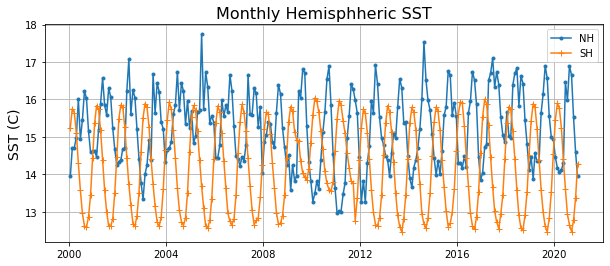

In [186]:
plt.figure(figsize=(10,4))
plt.plot(nh_sst.time, nh_sst, '.-',label='NH') # the basic method plot() is used for line plots.
plt.plot(sh_sst.time, sh_sst, '+-', c='tab:orange', label='SH')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('SST (C)', fontsize=14)
plt.title('Monthly Hemisphheric SST', fontsize=16)
plt.show() # Note that we didn't use this before, but it a necesary line to finalize and properly display a figure

<font color=#d55121>__In the next cell__</font> we plot the anomalies, separatng with color the positive and negative values. This is a more complicated plot that requires operate on the data first (using the method _.where_), but the plotting part is stratight forward.

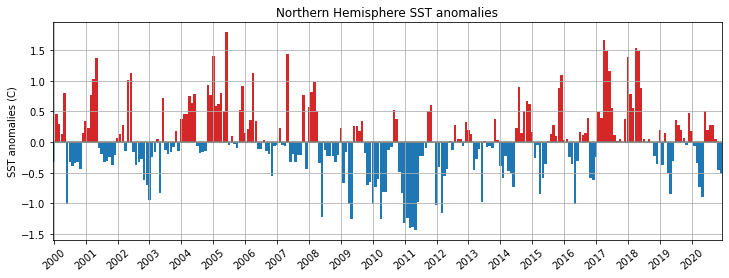

In [189]:
plt.figure(figsize=(12,4))
pos = nh_ssta.where(nh_ssta>=0)
neg = nh_ssta.where(nh_ssta<0)
dates = nh_ssta.time.dt.year + (nh_ssta.time.dt.month-1)/12
plt.bar(dates, pos.values, width=1/13, color='tab:red', zorder=1, edgecolor=None)
plt.bar(dates, neg.values, width=1/13, color='tab:blue',zorder=1)
plt.axhline(color='grey',zorder=2)
plt.grid(True, zorder=0)
plt.ylabel('SST anomalies (C)')
plt.title('Northern Hemisphere SST anomalies')
plt.xticks([*range(2000,2021,1)], rotation=40)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()


***
## <font color=#d55121>Map plotting</font> 

Now we turn to customize our maps. While the quick plot method from __xarray__ is in many cases all we neeed. Sometimes we require a more costumized or nicer image: for a presentation or publication. Here we illustrate this, because we will use it in the next chapters. It might seem like complicated code, but really there are only many customized elements - many of then could be left to the default values, but we wanted to show how to do so.

For global plots, extend and coordinate labels are sometimes not necessary to specify, but we choose a regional plot for the next example to show how to plot and label only a particular region. 

<font color=#31909f>__Note__</font> that in the next to last line, we will also save our figure, and display it in the last line. 

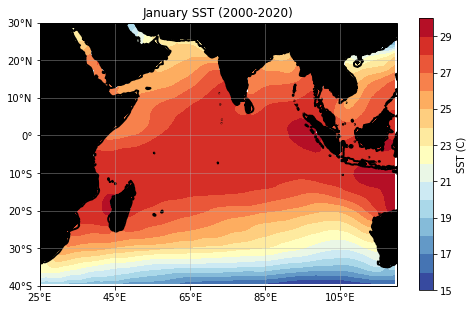

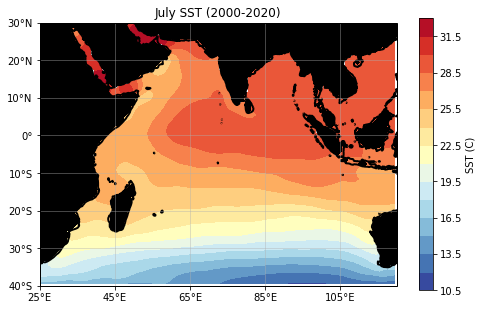

In [190]:
# import functions to label coordinates and add color to the land mass (otherwise is white)
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import calendar # this library give us quick access to names and numbers related to dates

# select a region of our data
region = np.array([[30,-40],[25,120]]) # numpy array that specifies the lat/lon boundaries of our selected region
io_sst = ds.sst.sel(latitude=slice(region[0,0],region[0,1]),longitude=slice(region[1,0],region[1,1])) # select region

for mon in [1,7]:  # select two months of data to plot: month 1 and month 7
    moname = calendar.month_name[mon] # get the name of the month
    tmp = io_sst.sel(time=ds.time.dt.month==mon).mean('time') # select only one monthh at a time in a temporal object

    # create and set the figure context
    fig = plt.figure(figsize=(8,5)) # create a figure object, and assign it a variable name fig
    ax = plt.axes(projection=ccrs.PlateCarree()) # projection type - this one is easy to use
    ax.coastlines(resolution='50m',linewidth=2,color='black') 
    ax.add_feature(cfeature.LAND, color='black')
    ax.set_extent([region[1,0],region[1,1],region[0,0],region[0,1]],crs=ccrs.PlateCarree()) 
    ax.set_xticks([*range(region[1,0],region[1,1]+1,20)], crs=ccrs.PlateCarree()) # customize ticks and labels to longitude
    ax.set_yticks([*range(region[0,1],region[0,0]+1,10)], crs=ccrs.PlateCarree()) # customize ticks and labels to latitude
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, alpha=0.5) # add a grid. the alpha argument specify the level of transparency of a plot figure

    # the core: the data to plot
    plt.contourf(tmp.longitude,tmp.latitude, tmp,15, cmap='RdYlBu_r') # contourf (filled contour plot) takes the 1D lat and lon coordinates for the 2D data. cmap specify the colormap to use.
    cbar=plt.colorbar()
    cbar.set_label('SST (C)')
    plt.title(moname+' SST (2000-2020)')
    fig.savefig('./figures/map_base_'+moname+'.png') # save your figure by usinig the method .savefig. python recognized the format from the filename extension. 
    plt.show()

***
## <font color=#d55121>Resources</font> 

__Matplotlib__ - the Official site: [https://matplotlib.org/](https://matplotlib.org/) 

Make sure to look at their gallery, which contains the code for each plot: [https://matplotlib.org/stable/gallery/index.html](https://matplotlib.org/stable/gallery/index.html)

A very simple, step by step tutorial to matplotlib: [https://github.com/rougier/matplotlib-tutorial](https://github.com/rougier/matplotlib-tutorial)

__Cartopy__ - the Official site: [https://scitools.org.uk/cartopy/docs/latest/](https://scitools.org.uk/cartopy/docs/latest/), and gallery: [https://scitools.org.uk/cartopy/docs/latest/gallery/index.html](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)

R. Abernathey's tutorial to Cartopy - Step by Step and very accessible: [https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html) 

__Seaborn__ - We didn't talk about Seaborn, but it is a very nice library for beatiful and well designed functions for statistical data visualization. Make sure you take a look at their gallery: [https://seaborn.pydata.org/index.html](https://seaborn.pydata.org/index.html)

__Groupby__ - the offical reference [http://xarray.pydata.org/en/stable/groupby.html](http://xarray.pydata.org/en/stable/groupby.html)

The __xarray__ page also have some useful examples for [weather](http://xarray.pydata.org/en/stable/examples/weather-data.html) and [climate](http://xarray.pydata.org/en/stable/examples/monthly-means.html) data that applies the methods (and more) used here.
